In [1]:
import soditools.soditools as u
import pandas as pd
import numpy as np

In [2]:
country_id = 'BR'

plp_file = f'UPSELL_{country_id}.csv'
plp_bucket = f'bucket_recommender_{country_id.lower()}'
plp_path = f'gs://{plp_bucket}/'

sandbox_file = f'UPSELL_{country_id}.csv'
sandbox_bucket = f'bucket_recommender_sandbox_{country_id.lower()}'
sandbox_path = f'gs://{sandbox_bucket}/'

In [3]:
# df = pd.read_csv(_path+_file)
df_plp = pd.read_csv(plp_path+plp_file)

In [4]:
df_plp.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,578992,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...
1,863793,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...
2,881503,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...
3,782898,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...
4,669596,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...


In [5]:
df_sandbox = pd.read_csv(sandbox_path+sandbox_file)

In [6]:
df_sandbox.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,54291,1004893|1004892|1029099|740269|1004891|1087|10...,1004893|1004892|1029099|740269|1004891|1087|10...,1004893|1004892|1029099|740269|1004891|1087|10...,1004893|1004892|1029099|740269|1004891|1087|10...,1004893|1004892|1029099|740269|1004891|1087|10...,1004893|1004892|1029099|740269|1004891|1087|10...
1,896427,1681123|1681129|1026626|1681127|1026625|102662...,1681123|1681129|1026626|1681127|1026625|102662...,1681123|1681129|1026626|1681127|1026625|102662...,1681123|1681129|1026626|1681127|1026625|102662...,1681123|1681129|1026626|1681127|1026625|102662...,1681123|1681129|1026626|1681127|1026625|102662...
2,738904,796332|864963|796363|1640929|864922|1021041|88...,796332|864963|796363|1640929|864922|1021041|88...,796332|864963|796363|1640929|864922|1021041|88...,796332|864963|796363|1640929|864922|1021041|88...,796332|864963|796363|1640929|864922|1021041|88...,796332|864963|796363|1640929|864922|1021041|88...
3,34030,34120|558301|169698|900601|900595|900596|71249...,34120|558301|169698|900601|900595|900596|71249...,34120|558301|169698|900601|900595|900596|71249...,34120|558301|169698|900601|900595|900596|71249...,34120|558301|169698|900601|900595|900596|71249...,34120|558301|169698|900601|900595|900596|71249...
4,754786,712477|130867|280858|686893|4822|900600|4704|7...,712477|130867|280858|686893|4822|900600|4704|7...,712477|130867|280858|686893|4822|900600|4704|7...,712477|130867|280858|686893|4822|900600|4704|7...,712477|130867|280858|686893|4822|900600|4704|7...,712477|130867|280858|686893|4822|900600|4704|7...


In [7]:
df_plp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69585 entries, 0 to 69584
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              69585 non-null  int64 
 1   upsell_a_pro           69585 non-null  object
 2   upsell_a_hogar         69585 non-null  object
 3   upsell_a_sin_segmento  69585 non-null  object
 4   upsell_b_pro           69585 non-null  object
 5   upsell_b_hogar         69585 non-null  object
 6   upsell_b_sin_segmento  69585 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [8]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69584 entries, 0 to 69583
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              69584 non-null  int64 
 1   upsell_a_pro           69584 non-null  object
 2   upsell_a_hogar         69584 non-null  object
 3   upsell_a_sin_segmento  69584 non-null  object
 4   upsell_b_pro           69584 non-null  object
 5   upsell_b_hogar         69584 non-null  object
 6   upsell_b_sin_segmento  69584 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [9]:
_cols = ['productId','upsell_b_sin_segmento','upsell_b_pro','upsell_b_hogar']
df = pd.merge(left=df_plp[_cols], right=df_sandbox[_cols], how='outer', on='productId', suffixes=['_plp','_sandbox'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69585 entries, 0 to 69584
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   productId                      69585 non-null  int64 
 1   upsell_b_sin_segmento_plp      69585 non-null  object
 2   upsell_b_pro_plp               69585 non-null  object
 3   upsell_b_hogar_plp             69585 non-null  object
 4   upsell_b_sin_segmento_sandbox  69584 non-null  object
 5   upsell_b_pro_sandbox           69584 non-null  object
 6   upsell_b_hogar_sandbox         69584 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [11]:
df.head()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
0,578992,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,750736|750735|578995|578996|750734|626537|7523...,750736|750735|578995|578996|750734|626537|7523...,750736|750735|578995|578996|750734|626537|7523...
1,863793,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|870809|787992|1003627|1680700|1...,1630709|863781|870809|787992|1003627|1680700|1...,1630709|863781|870809|787992|1003627|1680700|1...
2,881503,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889167|889174|889169|888764|889166|8891...,889175|889167|889174|889169|888764|889166|8891...,889175|889167|889174|889169|888764|889166|8891...
3,782898,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782901|782875|782902|782900|782874|782873|7828...,782901|782875|782902|782900|782874|782873|7828...,782901|782875|782902|782900|782874|782873|7828...
4,669596,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669647|669860|669753|669811|669672|669861|6697...,669647|669860|669753|669811|669672|669861|6697...,669647|669860|669753|669811|669672|669861|6697...


In [12]:
df.describe()

,productId
count,6.958500e+04
mean,1.019730e+08
std,3.073910e+08
min,1.000000e+02
25%,6.727420e+05
50%,7.850760e+05
75%,1.026599e+06
max,1.794228e+10


In [13]:
from typing import Tuple

def compare_lists(str_list1: str, str_list2: str, separator: str = "|") -> Tuple[float, float, float]:
    """
    Compara dos listas representadas como strings usando múltiples métricas:
    - Jaccard Similarity
    - Sorensen-Dice Coefficient
    - Overlap Coefficient
    
    :param str_list1: Primer string de elementos separados por el delimitador.
    :param str_list2: Segundo string de elementos separados por el delimitador.
    :param separator: Caracter que separa los elementos en los strings (por defecto "|").
    :return: (Jaccard, Dice, Overlap)
    """
    if not isinstance(str_list1, str):
        str_list1 = str(str_list1) if str_list1 is not None else ""

    if not isinstance(str_list2, str):
        str_list2 = str(str_list2) if str_list2 is not None else ""

    if not str_list1 or not str_list2:
        return (0.0, 0.0, 0.0)

    set1 = set(str_list1.split(separator))
    set2 = set(str_list2.split(separator))

    intersection = len(set1 & set2)
    union = len(set1 | set2)
    min_size = min(len(set1), len(set2))

    jaccard = intersection / union if union != 0 else 0.0
    dice = (2 * intersection) / (len(set1) + len(set2)) if (len(set1) + len(set2)) != 0 else 0.0
    overlap = intersection / min_size if min_size != 0 else 0.0

    return (jaccard, dice, overlap)

In [14]:
df.columns

Index(['productId', 'upsell_b_sin_segmento_plp', 'upsell_b_pro_plp',
       'upsell_b_hogar_plp', 'upsell_b_sin_segmento_sandbox',
       'upsell_b_pro_sandbox', 'upsell_b_hogar_sandbox'],
      dtype='object')

In [15]:
df['sim_b_sin_segmento'] = df[['upsell_b_sin_segmento_plp','upsell_b_sin_segmento_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_pro'] = df[['upsell_b_pro_plp','upsell_b_pro_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_hogar'] = df[['upsell_b_hogar_plp','upsell_b_hogar_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)

In [16]:
df.head(10)

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
0,578992,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,578995|578996|626537|626521|752312|129753|6952...,750736|750735|578995|578996|750734|626537|7523...,750736|750735|578995|578996|750734|626537|7523...,750736|750735|578995|578996|750734|626537|7523...,0.200,0.200,0.200
1,863793,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|882113|1698378|1630715|1630716|...,1630709|863781|870809|787992|1003627|1680700|1...,1630709|863781|870809|787992|1003627|1680700|1...,1630709|863781|870809|787992|1003627|1680700|1...,0.300,0.300,0.300
2,881503,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889168|888764|889167|889169|889166|8891...,889175|889167|889174|889169|888764|889166|8891...,889175|889167|889174|889169|888764|889166|8891...,889175|889167|889174|889169|888764|889166|8891...,0.625,0.625,0.625
3,782898,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782874|782900|782872|782899|782902|782901|7828...,782901|782875|782902|782900|782874|782873|7828...,782901|782875|782902|782900|782874|782873|7828...,782901|782875|782902|782900|782874|782873|7828...,0.850,0.850,0.850
4,669596,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669729|669647|669672|669811|669753|669746|6698...,669647|669860|669753|669811|669672|669861|6697...,669647|669860|669753|669811|669672|669861|6697...,669647|669860|669753|669811|669672|669861|6697...,0.900,0.900,0.900
5,1057547,1057548|1057545|1057551|1057546|1057550|105754...,1057548|1057545|1057551|1057546|1057550|105754...,1057548|1057545|1057551|1057546|1057550|105754...,858518|1057548|1057546|1057545|1057551|1057553...,858518|1057548|1057546|1057545|1057551|1057553...,858518|1057548|1057546|1057545|1057551|1057553...,0.750,0.750,0.750
6,887290002,880937|880356005|887184|880353003|880927002|88...,880937|880356005|887184|880353003|880927002|88...,880937|880356005|887184|880353003|880927002|88...,1085367|887182|1085370|887289003|1085365|88729...,1085367|887182|1085370|887289003|1085365|88729...,1085367|887182|1085370|887289003|1085365|88729...,0.100,0.100,0.100
7,756632,755478|756903|756913|755483|755471|755480|7554...,755478|756903|756913|755483|755471|755480|7554...,755478|756903|756913|755483|755471|755480|7554...,756913|755478|746896|756906|756904|750172|7569...,756913|755478|746896|756906|756904|750172|7569...,756913|755478|746896|756906|756904|750172|7569...,0.600,0.600,0.600
8,787148,746646|746623|746611|746625|792533|792555|7925...,746646|746623|746611|746625|792533|792555|7925...,746646|746623|746611|746625|792533|792555|7925...,746646|746625|746611|739965|739987|739988|7399...,746646|746625|746611|739965|739987|739988|7399...,746646|746625|746611|739965|739987|739988|7399...,0.150,0.150,0.150
9,26239,881908003|881908004|900947|881896002|900950|89...,881908003|881908004|900947|881896002|900950|89...,881908003|881908004|900947|881896002|900950|89...,881908003|899780|899781|877202|877203|900933|8...,881908003|899780|899781|877202|877203|900933|8...,881908003|899780|899781|877202|877203|900933|8...,0.550,0.550,0.550


In [17]:
df[['sim_b_sin_segmento','sim_b_pro','sim_b_hogar']].describe()

,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
count,69585.000000,69585.000000,69585.000000
mean,0.608943,0.608943,0.608943
std,0.255281,0.255281,0.255281
min,0.000000,0.000000,0.000000
25%,0.450000,0.450000,0.450000
50%,0.650000,0.650000,0.650000
75%,0.800000,0.800000,0.800000
max,1.000000,1.000000,1.000000


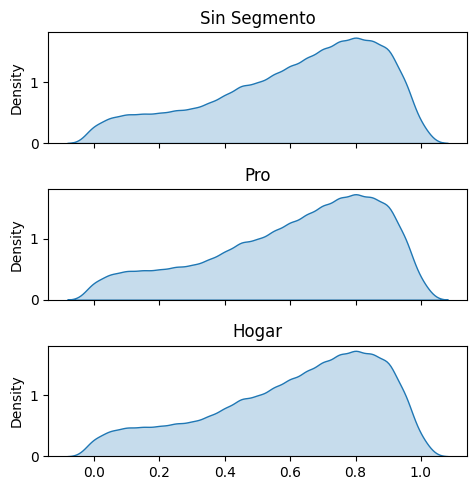

In [18]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax = ax.flat

sns.kdeplot(df['sim_b_sin_segmento'], fill=True, ax=ax[0])
ax[0].set_title('Sin Segmento')
ax[0].set_xlabel(None)
sns.kdeplot(df['sim_b_pro'], fill=True, ax=ax[1])
ax[1].set_title('Pro')
ax[1].set_xlabel(None)
sns.kdeplot(df['sim_b_hogar'], fill=True, ax=ax[2])
ax[2].set_title('Hogar')
ax[2].set_xlabel(None)


plt.tight_layout()

In [19]:
_threshold = .8
np.divide(df[df['sim_b_sin_segmento'] >= _threshold].shape[0], df.shape[0])

0.315441546310268